In [1]:
from utils import Twitter_Scraper
from config import Config

import nltk
import re
import pandas as pd
import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from textblob import TextBlob


In [2]:
# Create a new instance of the Twitter Scraper class

scraper = Twitter_Scraper(
    username=Config.USER_NAME,
    password=Config.USER_PASSWORD,
    headless=False
)

Initializing Twitter Scraper...
Setup WebDriver...
Initializing ChromeDriver...
WebDriver Setup Complete


In [3]:
scraper.login()


Logging in to Twitter...

Login Successful



# Run Twitter Scraper

In [4]:
data_dict = {}

In [5]:
keywords = ["#naukri", "#jobs", "#jobseeker", "#vacancy"]

for keyword in keywords:
    scraper.scrape_tweets(
        max_tweets=100,
        scrape_hashtag=keyword,
    )
    data_dict[keyword] = scraper.get_tweets()
    time.sleep(5)

Scraping Latest Tweets from #naukri...
Progress: [[===-------------------------------------]] 9.00% 9 of 100
No more tweets to scrape

Scraping Incomplete
Tweets: 9 out of 100

Scraping Latest Tweets from #jobs...
Progress: [[========================================]] 100.00% 100 of 100
Scraping Complete
Tweets: 100 out of 100

Scraping Latest Tweets from #jobseeker...
Progress: [[========================================]] 100.00% 100 of 100
Scraping Complete
Tweets: 100 out of 100

Scraping Latest Tweets from #vacancy...
Progress: [[========================================]] 100.00% 100 of 100
Scraping Complete
Tweets: 100 out of 100



In [6]:
# Get all the tweets in a single list
all_tweets = []

# Iterate over the dictionary and append all the tweets to the all_tweets list
for key, value in data_dict.items():
    for tweet in value:
        all_tweets.append(tweet)

In [7]:
df = pd.DataFrame(all_tweets,columns=['Name','Handle','Timestamp','Verified','Content','Comments','Retweets','Likes','Analytics','Tags','Mentions','Emojis','Profile Image','Tweet Link','Tweet ID','Tweeter ID','Following','Followers'])
df.to_csv('tweets_raw.csv',index=False)

In [8]:
# Read the csv file
df = pd.read_csv('tweets_raw.csv')

In [9]:
# Drop the columns that are not required
df = df[['Name','Handle','Timestamp','Content','Tags','Mentions','Likes','Retweets','Comments']]

In [10]:
#clean the data

def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text)
    text = re.sub(r'#[a-zA-Z0-9_]+', '', text)
    text = re.sub(r'https?://[a-zA-Z0-9./]+', '', text)
    text = re.sub(r'\s+', ' ', text)
    #text = nltk.word_tokenize(text)
    #text = nltk.remove_special_characters(text)
    return text


In [11]:
df['Content'] = df['Content'].apply(clean_text)

In [12]:
df

,Name,Handle,Timestamp,Content,Tags,Mentions,Likes,Retweets,Comments
0,Priactgann trader,@PABAT_Academy,2024-04-16T19:19:27.000Z,might manifest near 5678.85,"['#Naukri', '#buying', '#pressure', '#GANN', '...",[],1,0,0
1,JobSarkari,@Jobsarkari_com,2024-04-16T16:27:18.000Z,sarkari naukri | new new sarkari naukri | view...,"['#sarkari', '#naukri', '#sarkariNaukri', '#go...",[],0,0,0
2,Nitin Lakhera,@NitinLakhera86,2024-04-16T14:44:30.000Z,भोज विश्वविद्यालय के परीक्षा फॉर्म भरने लगे है...,"['#SarkariResult', '#bhoj', '#university', '#n...",[],1,0,0
3,National Career Service - India,@NCSIndia,2024-04-16T11:26:40.000Z,ncs provides support to jobseekers trying to i...,"['#NCSParRegisterKiyaKya', '#NCS', '#Jobs', '#...",[],1,0,0
4,mStockIdeas,@mStockIdeas,2024-04-16T07:37:04.000Z,stock name :- naukri cmp : 5755.0 entry (proxi...,"['#NAUKRI', '#StockMarket', '#Trading', '#STOC...",[],0,0,0
...,...,...,...,...,...,...,...,...,...
304,Lituhayu,@Paranggendis,2024-04-17T02:55:20.000Z,": admin ngo, salary starts from 4 mio/month. ...","['#vacancy', '#loker', '#Denpasar']",[],1,1,1
305,DATA DOT COA ZA,@DataDotcoaza,2024-04-17T02:53:39.000Z,"software development engineer , ec2 nitro","['#USA', '#job', '#vacancy', '#jobseeker']",[],0,0,0
306,Er Satish Kumar,@satishnagarajan,2024-04-17T02:42:27.000Z,dated 17.4.24 17-19,"['#opportunity', '#vacancy']",[],0,0,0
307,Er Satish Kumar,@satishnagarajan,2024-04-17T02:42:18.000Z,dated 17.4.24 13-16,"['#opportunity', '#vacancy']",[],3,0,1


In [35]:
df['Sentiment'] = df['Content'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['Sentiment'] = df['Sentiment'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')

In [36]:
df

,Name,Handle,Timestamp,Content,Tags,Mentions,Likes,Retweets,Comments,Sentiment,Preprocessed_Tweet,Dominant_Topic
0,Priactgann trader,@PABAT_Academy,2024-04-16T19:19:27.000Z,might manifest near 5678.85,"['#Naukri', '#buying', '#pressure', '#GANN', '...",[],1,0,0,Positive,might manifest near 567885,4
1,JobSarkari,@Jobsarkari_com,2024-04-16T16:27:18.000Z,sarkari naukri | new new sarkari naukri | view...,"['#sarkari', '#naukri', '#sarkariNaukri', '#go...",[],0,0,0,Positive,sarkari naukri new new sarkari naukri view a...,1
2,Nitin Lakhera,@NitinLakhera86,2024-04-16T14:44:30.000Z,भोज विश्वविद्यालय के परीक्षा फॉर्म भरने लगे है...,"['#SarkariResult', '#bhoj', '#university', '#n...",[],1,0,0,Neutral,भज वशववदयलय क परकष फरम भरन लग ह अतम तथ 20 अपरल...,3
3,National Career Service - India,@NCSIndia,2024-04-16T11:26:40.000Z,ncs provides support to jobseekers trying to i...,"['#NCSParRegisterKiyaKya', '#NCS', '#Jobs', '#...",[],1,0,0,Positive,ncs provides support to jobseekers trying to i...,1
4,mStockIdeas,@mStockIdeas,2024-04-16T07:37:04.000Z,stock name :- naukri cmp : 5755.0 entry (proxi...,"['#NAUKRI', '#StockMarket', '#Trading', '#STOC...",[],0,0,0,Neutral,stock name naukri cmp 57550 entry proximal ...,2
...,...,...,...,...,...,...,...,...,...,...,...,...
304,Lituhayu,@Paranggendis,2024-04-17T02:55:20.000Z,": admin ngo, salary starts from 4 mio/month. ...","['#vacancy', '#loker', '#Denpasar']",[],1,1,1,Neutral,admin ngo salary starts from 4 miomonth send...,4
305,DATA DOT COA ZA,@DataDotcoaza,2024-04-17T02:53:39.000Z,"software development engineer , ec2 nitro","['#USA', '#job', '#vacancy', '#jobseeker']",[],0,0,0,Neutral,software development engineer ec2 nitro,3
306,Er Satish Kumar,@satishnagarajan,2024-04-17T02:42:27.000Z,dated 17.4.24 17-19,"['#opportunity', '#vacancy']",[],0,0,0,Neutral,dated 17424 1719,0
307,Er Satish Kumar,@satishnagarajan,2024-04-17T02:42:18.000Z,dated 17.4.24 13-16,"['#opportunity', '#vacancy']",[],3,0,1,Neutral,dated 17424 1316,4


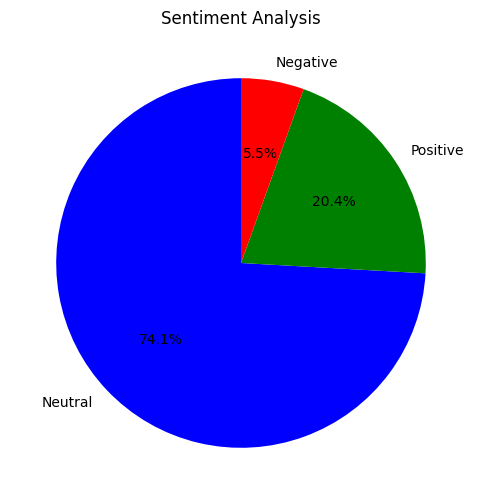

In [41]:
#create a pie chart to show the sentiment of the tweets

import matplotlib.pyplot as plt

sentiment_count = df['Sentiment'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(sentiment_count, labels=sentiment_count.index, autopct='%1.1f%%', startangle=90,colors=['blue','green','red'])
plt.title('Sentiment Analysis')

plt.show()



In [42]:
# Preprocess tweets for topic modeling 
def preprocess_for_topic_modeling(text):
  text = clean_text(text)  
  text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
  # You can further implement stemming or lemmatization here (e.g., using NLTK)

  return text

In [43]:
# Prepare data for topic modeling
df['Preprocessed_Tweet'] = df['Content'].apply(preprocess_for_topic_modeling)
documents = df['Preprocessed_Tweet'].tolist()


In [44]:
# Define number of topics
num_topics = 5 

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Perform Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda_model = lda.fit(tfidf_matrix)


In [45]:
# Print topic words
for idx, topic in enumerate(lda.components_):
  print("Topic ", str(idx + 1) + ":")
  print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
  print("\n")


Topic  1:
['solar', 'rexx', 'trade', 'schichtverantwortung', 'mit', 'cashier', 'verkäufer', 'teilzeit', 'mwd', 'utm_mediumdlvritutm_sourcetwitter']


Topic  2:
['elizabeth', 'port', 'documentation', 'apply', 'join', 'jobs', 'store', 'technical', 'developer', 'assistant']


Topic  3:
['research', 'engineer', 'installations', 'fulltime', 'childrens', 'beginnings', 'teachers', 'parttime', 'coordinator', 'technician']


Topic  4:
['engineer', 'associate', 'endodontist', 'litigation', 'bac', 'fargo', 'wfb', 'attorney', 'thread', 'topic']


Topic  5:
['service', 'chain', 'supply', 'hiring', 'office', 'group', 'customer', 'finance', 'financial', 'manager']




In [46]:

# Analyze tweet distribution across topics (optional)
document_topic = lda_model.transform(tfidf_matrix)
df['Dominant_Topic'] = document_topic.argmax(axis=1)
topic_counts = df['Dominant_Topic'].value_counts()
print(topic_counts)

Dominant_Topic
4    73
3    70
1    69
2    50
0    47
Name: count, dtype: int64


In [47]:
scraper.driver.close()